# Einfuehrung in VAT

Welcome to geoengine-python! This notebook should show you around and explain the basics of how geoengine-python and the VAT are interconnected.

This notebook should show the capabilities of GeoEngine. Therefore a few useful techniques will be shown: 
- Introduction of the geoengine-python package
- Loading of a dataset
- Use of operators
- Plotting of the results
- First Simple Nested Workflows
- The connection between Python and VAT
- 

It is recommended when building a own nested workflow to build it in multiple steps as seen in this notebook.

Documentation about the Operators and how to use them in Python can be found here: [https://docs.geoengine.io/operators/intro.html](https://docs.geoengine.io/operators/intro.html)

## Preparation

In the beginning, the geoengine-python package needs to be imported:

In [1]:
import geoengine as ge

For plotting it is currently also necessary to import altair:

In [2]:
import altair as alt

In [3]:
#Other imports
from datetime import datetime
import matplotlib.pyplot as plt

To create a connection with the VAT the `ge.initialize` along with the api url can be used:

In [4]:
ge.initialize("https://vat.gfbio.org/api")

In case of an locally hosted instance the link would be `http://localhost:4200/api`

For a more convenient work with the GBIF DataProvider it is possible to get the name from the `root_collection`:

In [5]:
root_collection = ge.layer_collection()
gbif_prov_id = ''
for elem in root_collection.items:
    if elem.name == 'GBIF':
        gbif_prov_id = str(elem.provider_id)
        
gbif_prov_id

'1c01dbb9-e3ab-f9a2-06f5-228ba4b6bf7a'

To load data, use operators or plot vector data 'workflows' needs to be created as shown in loading the dragonfly species *Aeshna affinis*

## Load Aeshna affinis from the GBIF DataProvider

For a workflow to work he must be registered in the VAT or GeoEngine instance. Therefore the `ge.register_workflow` command followed by the command in JSON can be used:

In [6]:
workflow_aeshna_affinis = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "OgrSource",
        "params": {
            "data": f"_:{gbif_prov_id}:`species/Aeshna affinis`",
        }
    }
})

workflow_aeshna_affinis

c7b6b25a-714d-58d1-9f53-db7bf4995a5b

The result of each registration is the workflow_id, which can be directly used in VAT to trigger the workflow. To finally load the vector data from VAT the `.get_dataframe` method can be used. The method takes as parameters the search extent, a time interval, the spatial resolution and an coordinate reference system.

(-90.0, 90.0)

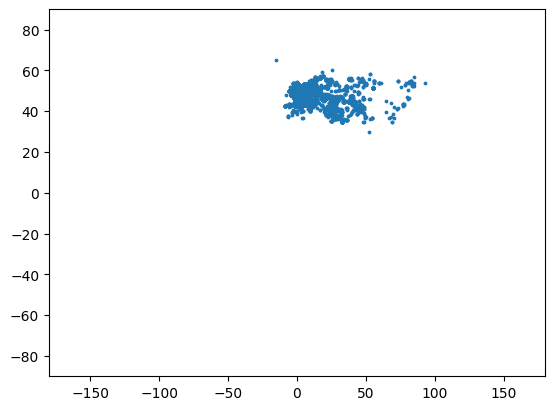

In [7]:
#Set time
time = datetime.strptime(
    '2000-01-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

#Request the data from Geoengine into a geopandas dataframe
data = workflow_aeshna_affinis.get_dataframe(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.1, 0.1),
        srs="EPSG:4326"
    )
)

#Plot the data
ax = data.plot(markersize=3)
ax.set_xlim([-180,180])
ax.set_ylim([-90,90])

The extent was chosen because to make clear, that the occurences of *Aeshna affinis* only occure on the eurasian continent. Without the x and y limiter the plot would look different:

<Axes: >

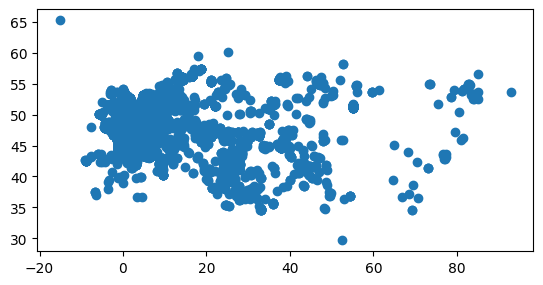

In [8]:
data.plot()

Beside vector data, also raster data could be load from the VAT.

# Loading Minimum and Maximum temperature from the temperature collection

To load raster data again a workflow must be registered, but this time not the 'OgrSource' is used but the 'GdalSource':

In [9]:
workflow_t_min = ge.register_workflow({ 
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": "tmin"
        }
    }
})

workflow_t_min

32efa84b-5e85-511c-8e78-6be68b61d749

The raster data then can be requested as a `xarray.DataArray` and plot that way:

/home/duempelmann/geoengine_env/lib/python3.10/site-packages/owslib/coverage/wcs110.py:85: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa


/home/duempelmann/geoengine_env/lib/python3.10/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


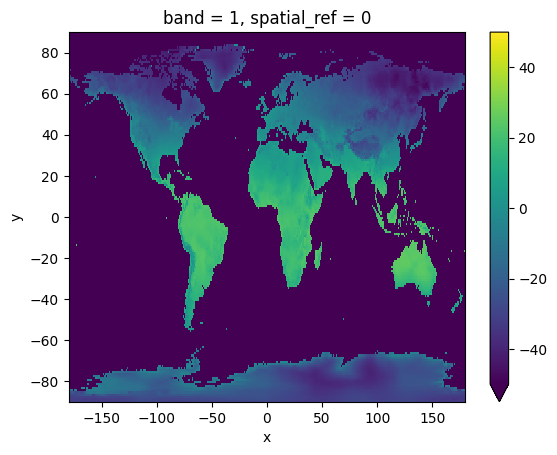

In [10]:
#Set time
time = datetime.strptime(
    '2000-01-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

#Request the data from Geoengine into a xarray dataarray
data = workflow_t_min.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1., 1.),
        srs="EPSG:4326"
    )
)

#Plot the data
data.plot(vmin=-50, vmax=50)

The same can be done for the maximum temperature:

In [11]:
workflow_t_max = ge.register_workflow({ 
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": "tmax"
        }
    }
})

workflow_t_max

6bb4c232-f7e7-53ce-a9ea-32267e7a3d92

/home/duempelmann/geoengine_env/lib/python3.10/site-packages/owslib/coverage/wcs110.py:85: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa


/home/duempelmann/geoengine_env/lib/python3.10/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


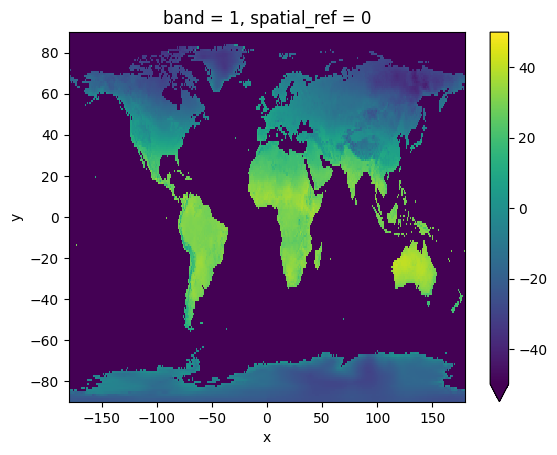

In [12]:
#Set time
time = datetime.strptime(
    '2000-01-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

#Request the data from Geoengine into a xarray dataarray
data = workflow_t_max.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.0, 1.0),
        srs="EPSG:4326"
    )
)

#Plot the data
data.plot(vmin=-50, vmax=50)

Beside loading data the VAT also have multiple operators to manipulate or transform geodata. One example is the raster vector join.

# Raster Vector Join between Aeshna affinis and the Minimum and Maximum Temperature

The raster vector join operator joins the vector data with one or more raster data based on the position of the vector features. As shown in this example the inputs are more or less the individual loading workflows:

In [13]:
workflow_aeshna_affinis_join = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "RasterVectorJoin",
        "params": {
            "names": ["Min_Temperature", "Max_Temperature"],
            "temporalAggregation": "none",
            "featureAggregation": "mean",
        },
        "sources": {
            "vector": { #Aeshna affinis ##########################################
                "type": "OgrSource",
                "params": {
                    "data": f"_:{gbif_prov_id}:`species/Aeshna affinis`",
                }
            }, ###################################################################
            "rasters": [{ #Minimum temperature ###################################
                    "type": "GdalSource",
                    "params": {
                        "data": "tmin"
                    }  
                }, ################################################################ 
                { #Maximum temperature ############################################
                    "type": "GdalSource",
                    "params": {
                    "data": "tmax"
                    }
                } #################################################################
            ]
        }
    }
})
    

workflow_aeshna_affinis_join

84f06ee2-ae0f-53e6-8589-e6c28268d817

As the results are vector data it again can be get by requesting the data as a GeoDataFrame:

In [14]:
#Set time
time = datetime.strptime(
    '2000-01-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

#Request the data from Geoengine into a geopandas dataframe
data_aeshna_affinis = workflow_aeshna_affinis_join.get_dataframe(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.1, 0.1),
        srs="EPSG:4326"
    )
)

#Show the geopandas dataframe
data_aeshna_affinis

,geometry,Max_Temperature,Min_Temperature,basisofrecord,gbifid,scientificname,start,end
0,POINT (6.99548 43.61310),11.8,3.4,HUMAN_OBSERVATION,2495387699,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
1,POINT (5.07159 43.53180),11.0,2.7,HUMAN_OBSERVATION,2497195052,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
2,POINT (2.61070 48.48122),6.0,0.7,HUMAN_OBSERVATION,2502161613,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
3,POINT (4.10000 51.95000),5.6,1.4,HUMAN_OBSERVATION,3727287205,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
4,POINT (7.05732 43.61081),11.6,3.7,HUMAN_OBSERVATION,2494833030,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...
20229,POINT (37.51322 55.69639),-5.2,-10.6,HUMAN_OBSERVATION,3994077214,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
20230,POINT (3.14781 48.61988),5.5,0.3,HUMAN_OBSERVATION,2495025637,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
20231,POINT (2.01661 48.66504),5.7,0.8,HUMAN_OBSERVATION,2511394666,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00
20232,POINT (4.10000 51.95000),5.6,1.4,HUMAN_OBSERVATION,1965566398,"Aeshna affinis Vander Linden, 1820",2000-01-01 00:00:00+00:00,2000-02-01 00:00:00+00:00


The data then also could be directly plot in pyhton:

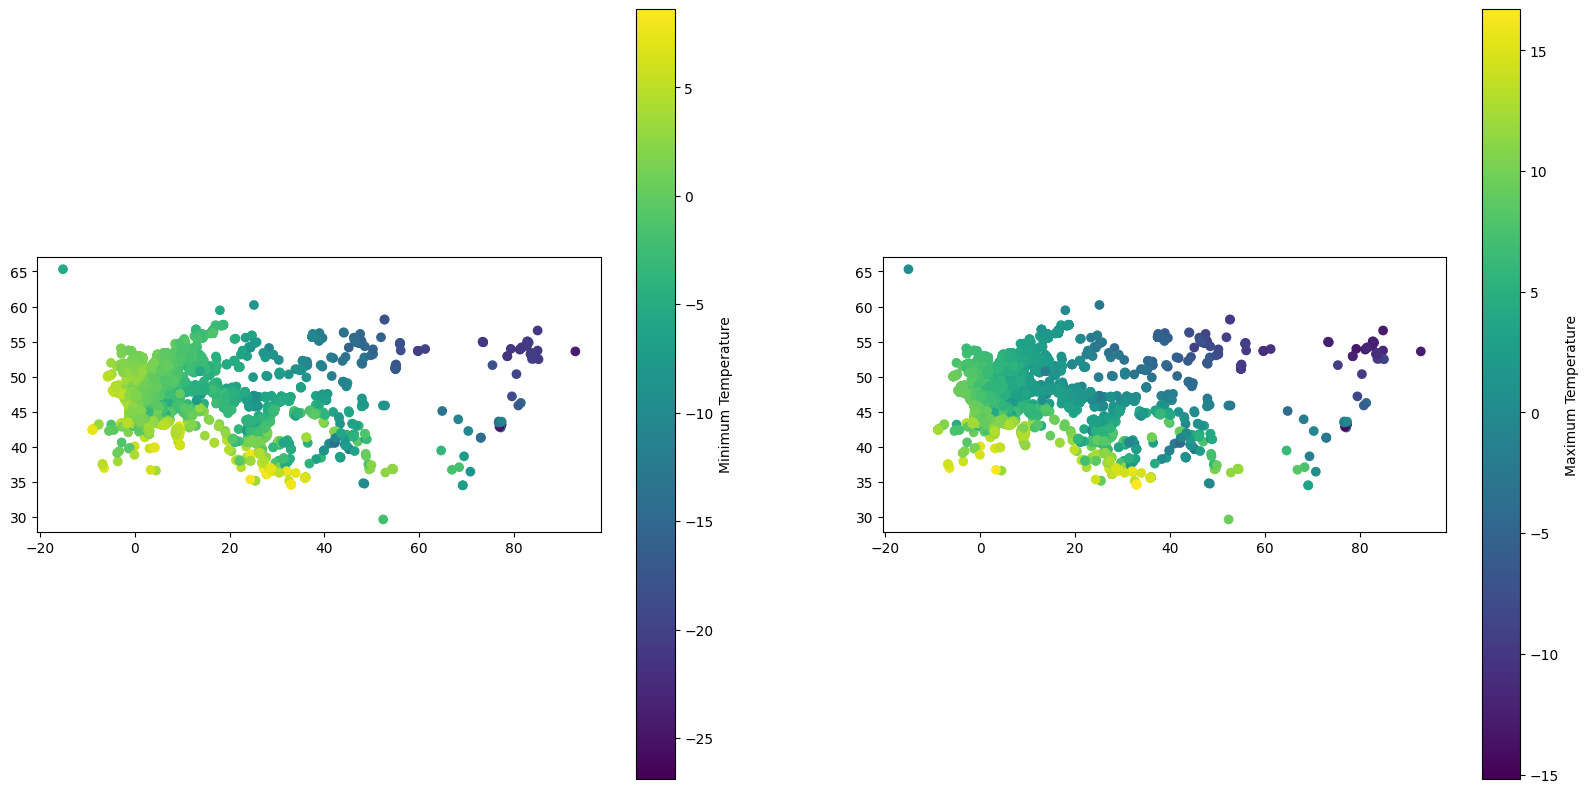

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

data_aeshna_affinis.plot(ax=ax[0], column='Min_Temperature', legend=True, legend_kwds={'label': 'Minimum Temperature'})
data_aeshna_affinis.plot(ax=ax[1], column='Max_Temperature', legend=True, legend_kwds={'label': 'Maximum Temperature'})

plt.show()

The VAT also offers some plot types of its own like Histograms.

# Plotting Aeshna affinis Minimum and Maximum Temperature as Histograms using VAT

To plot the data, of course, a workflow must be registered:

In [17]:
workflow_aeshna_affinis_join_plot_min = ge.register_workflow({
    "type": "Plot",
    "operator": {
       "type": "Histogram",
       "params": {
          "attributeName": "Min_Temperature",
           "bounds": "data",
           "buckets": {
               "type": "number",
               "value": 20
           }
       },
        "sources": {
            "source": { #Aeshna affinis Join #############################################
                "type": "RasterVectorJoin",
                "params": {
                    "names": ["Min_Temperature", "Max_Temperature"],
                    "temporalAggregation": "none",
                    "featureAggregation": "mean",
                },
                "sources": {
                    "vector": { 
                        "type": "OgrSource",
                        "params": {
                            "data": f"_:{gbif_prov_id}:`species/Aeshna affinis`",
                        }
                    }, 
                    "rasters": [{
                            "type": "GdalSource",
                            "params": {
                                "data": "tmin"
                            }  
                        }, 
                        {
                            "type": "GdalSource",
                            "params": {
                            "data": "tmax"
                            }
                        } 
                    ]
                } ##########################################################################
            } 
       }
    }
})
    
workflow_aeshna_affinis_join_plot_min

59fa07f9-6155-5ffb-bc87-00de20b9fd3f

The the method `.plot_chart` can be used to get the plot, which then can be plot using the `altair` package:

In [18]:
#Request the plot from Geoengine
plot_aeshna_affinis_min = workflow_aeshna_affinis_join_plot_min.plot_chart(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.1, 0.1),
        srs="EPSG:4326"
    )
)

#Show the plot
alt.Chart.from_dict(plot_aeshna_affinis_min.spec)

alt.Chart(...)

The same can be done for the maximum temperature:

In [19]:
workflow_aeshna_affinis_join_plot_max = ge.register_workflow({
    "type": "Plot",
    "operator": {
       "type": "Histogram",
       "params": {
          "attributeName": "Max_Temperature",
           "bounds": "data",
           "buckets": {
               "type": "number",
               "value": 20
           }
       },
        "sources": {
            "source": { #Aeshna affinis Join #############################################
                "type": "RasterVectorJoin",
                "params": {
                    "names": ["Min_Temperature", "Max_Temperature"],
                    "temporalAggregation": "none",
                    "featureAggregation": "mean",
                },
                "sources": {
                    "vector": { 
                        "type": "OgrSource",
                        "params": {
                            "data": f"_:{gbif_prov_id}:`species/Aeshna affinis`",
                        }
                    }, 
                    "rasters": [{
                            "type": "GdalSource",
                            "params": {
                                "data": "tmin"
                            }  
                        }, 
                        {
                            "type": "GdalSource",
                            "params": {
                            "data": "tmax"
                            }
                        } 
                    ]
                } ##########################################################################
            } 
       }
    }
})

#Request the plot from Geoengine
plot_aeshna_affinis_max = workflow_aeshna_affinis_join_plot_max.plot_chart(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180, -90, 180, 90),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.1, 0.1),
        srs="EPSG:4326"
    )
)

#Show the plot
alt.Chart.from_dict(plot_aeshna_affinis_max.spec)

alt.Chart(...)

As seen the VAT offers a lot of functionality, which will be deepend and extended over the course of the following examples.

# Further experiments

In this chapter some further useful uses between geoengine and python are shown

/home/duempelmann/geoengine_env/lib/python3.10/site-packages/owslib/coverage/wcs110.py:85: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa
/home/duempelmann/geoengine_env/lib/python3.10/site-packages/owslib/coverage/wcs110.py:85: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa
/home/duempelmann/geoengine_env/lib/python3.10/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home/duempelmann/geoengine_env/lib/python3.10/site-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in mult

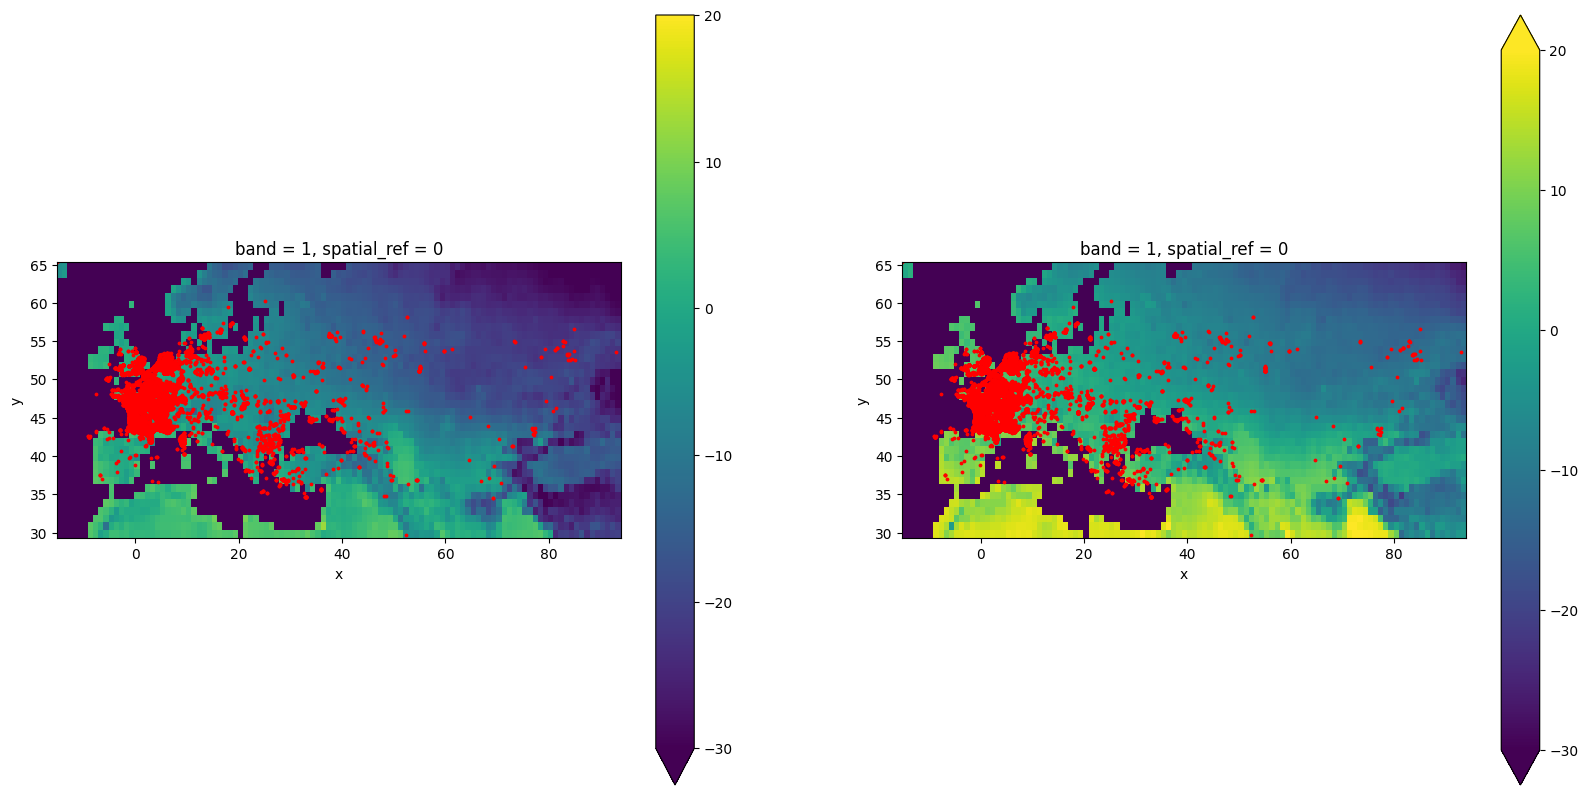

In [20]:
#Overlay plot with context
import geopandas as gpd
import matplotlib.pyplot as plt
#Set time
time = datetime.strptime(
    '2000-01-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

#Request the data from Geoengine into a xarray dataarray
data_min = workflow_t_min.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-15.1189, 29.6655, 92.9116, 65.3164),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.0, 1.0),
        srs="EPSG:4326"
    )
)

#Request the data from Geoengine into a xarray dataarray
data_max = workflow_t_max.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-15.1189, 29.6655, 92.9116, 65.3164),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.0, 1.0),
        srs="EPSG:4326"
    )
)


#Plot the data
fig, ax = plt.subplots(1, 2, figsize=(20,10))

data_min.plot(ax=ax[0], vmin=-30, vmax=20)
data_aeshna_affinis.plot(ax=ax[0], color='red', markersize=3)

data_max.plot(ax=ax[1], vmin=-30, vmax=20)
data_aeshna_affinis.plot(ax=ax[1], color='red', markersize=3)

plt.show()